In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../data/sdwpf_2001_2112_full.csv')

In [35]:
data.columns

Index(['TurbID', 'Tmstamp', 'Wspd', 'Wdir', 'Etmp', 'Itmp', 'Ndir', 'Pab1',
       'Pab2', 'Pab3', 'Prtv', 'T2m', 'Sp', 'RelH', 'Wspd_w', 'Wdir_w', 'Tp',
       'Patv'],
      dtype='object')

In [119]:
data_sorted = data.sort_values(by=['Tmstamp', 'TurbID'])

In [120]:
data_sorted['Tmstamp'] = pd.to_datetime(data_sorted['Tmstamp'])

In [15]:
data_cleaned = data_sorted.dropna(subset=['Patv'])

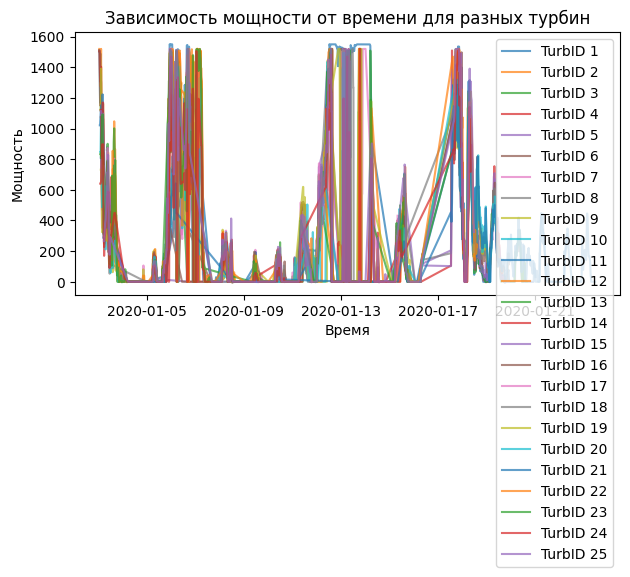

In [117]:
import matplotlib.pyplot as plt

plt.plot()

for turb_id in data_cleaned['TurbID'].unique()[:25]:
    subset = data_cleaned[data_cleaned['TurbID'] == turb_id][:1000]
    plt.plot(subset['Tmstamp'], subset['Patv'], label=f'TurbID {turb_id}', alpha=0.7)

plt.xlabel('Время')
plt.ylabel('Мощность')
plt.title('Зависимость мощности от времени для разных турбин')
plt.legend()
plt.tight_layout() 
plt.show()

In [ ]:
binary_matrix = data_cleaned.assign(Value=1).pivot_table(index='Tmstamp', columns='TurbID', values='Value', fill_value=0)

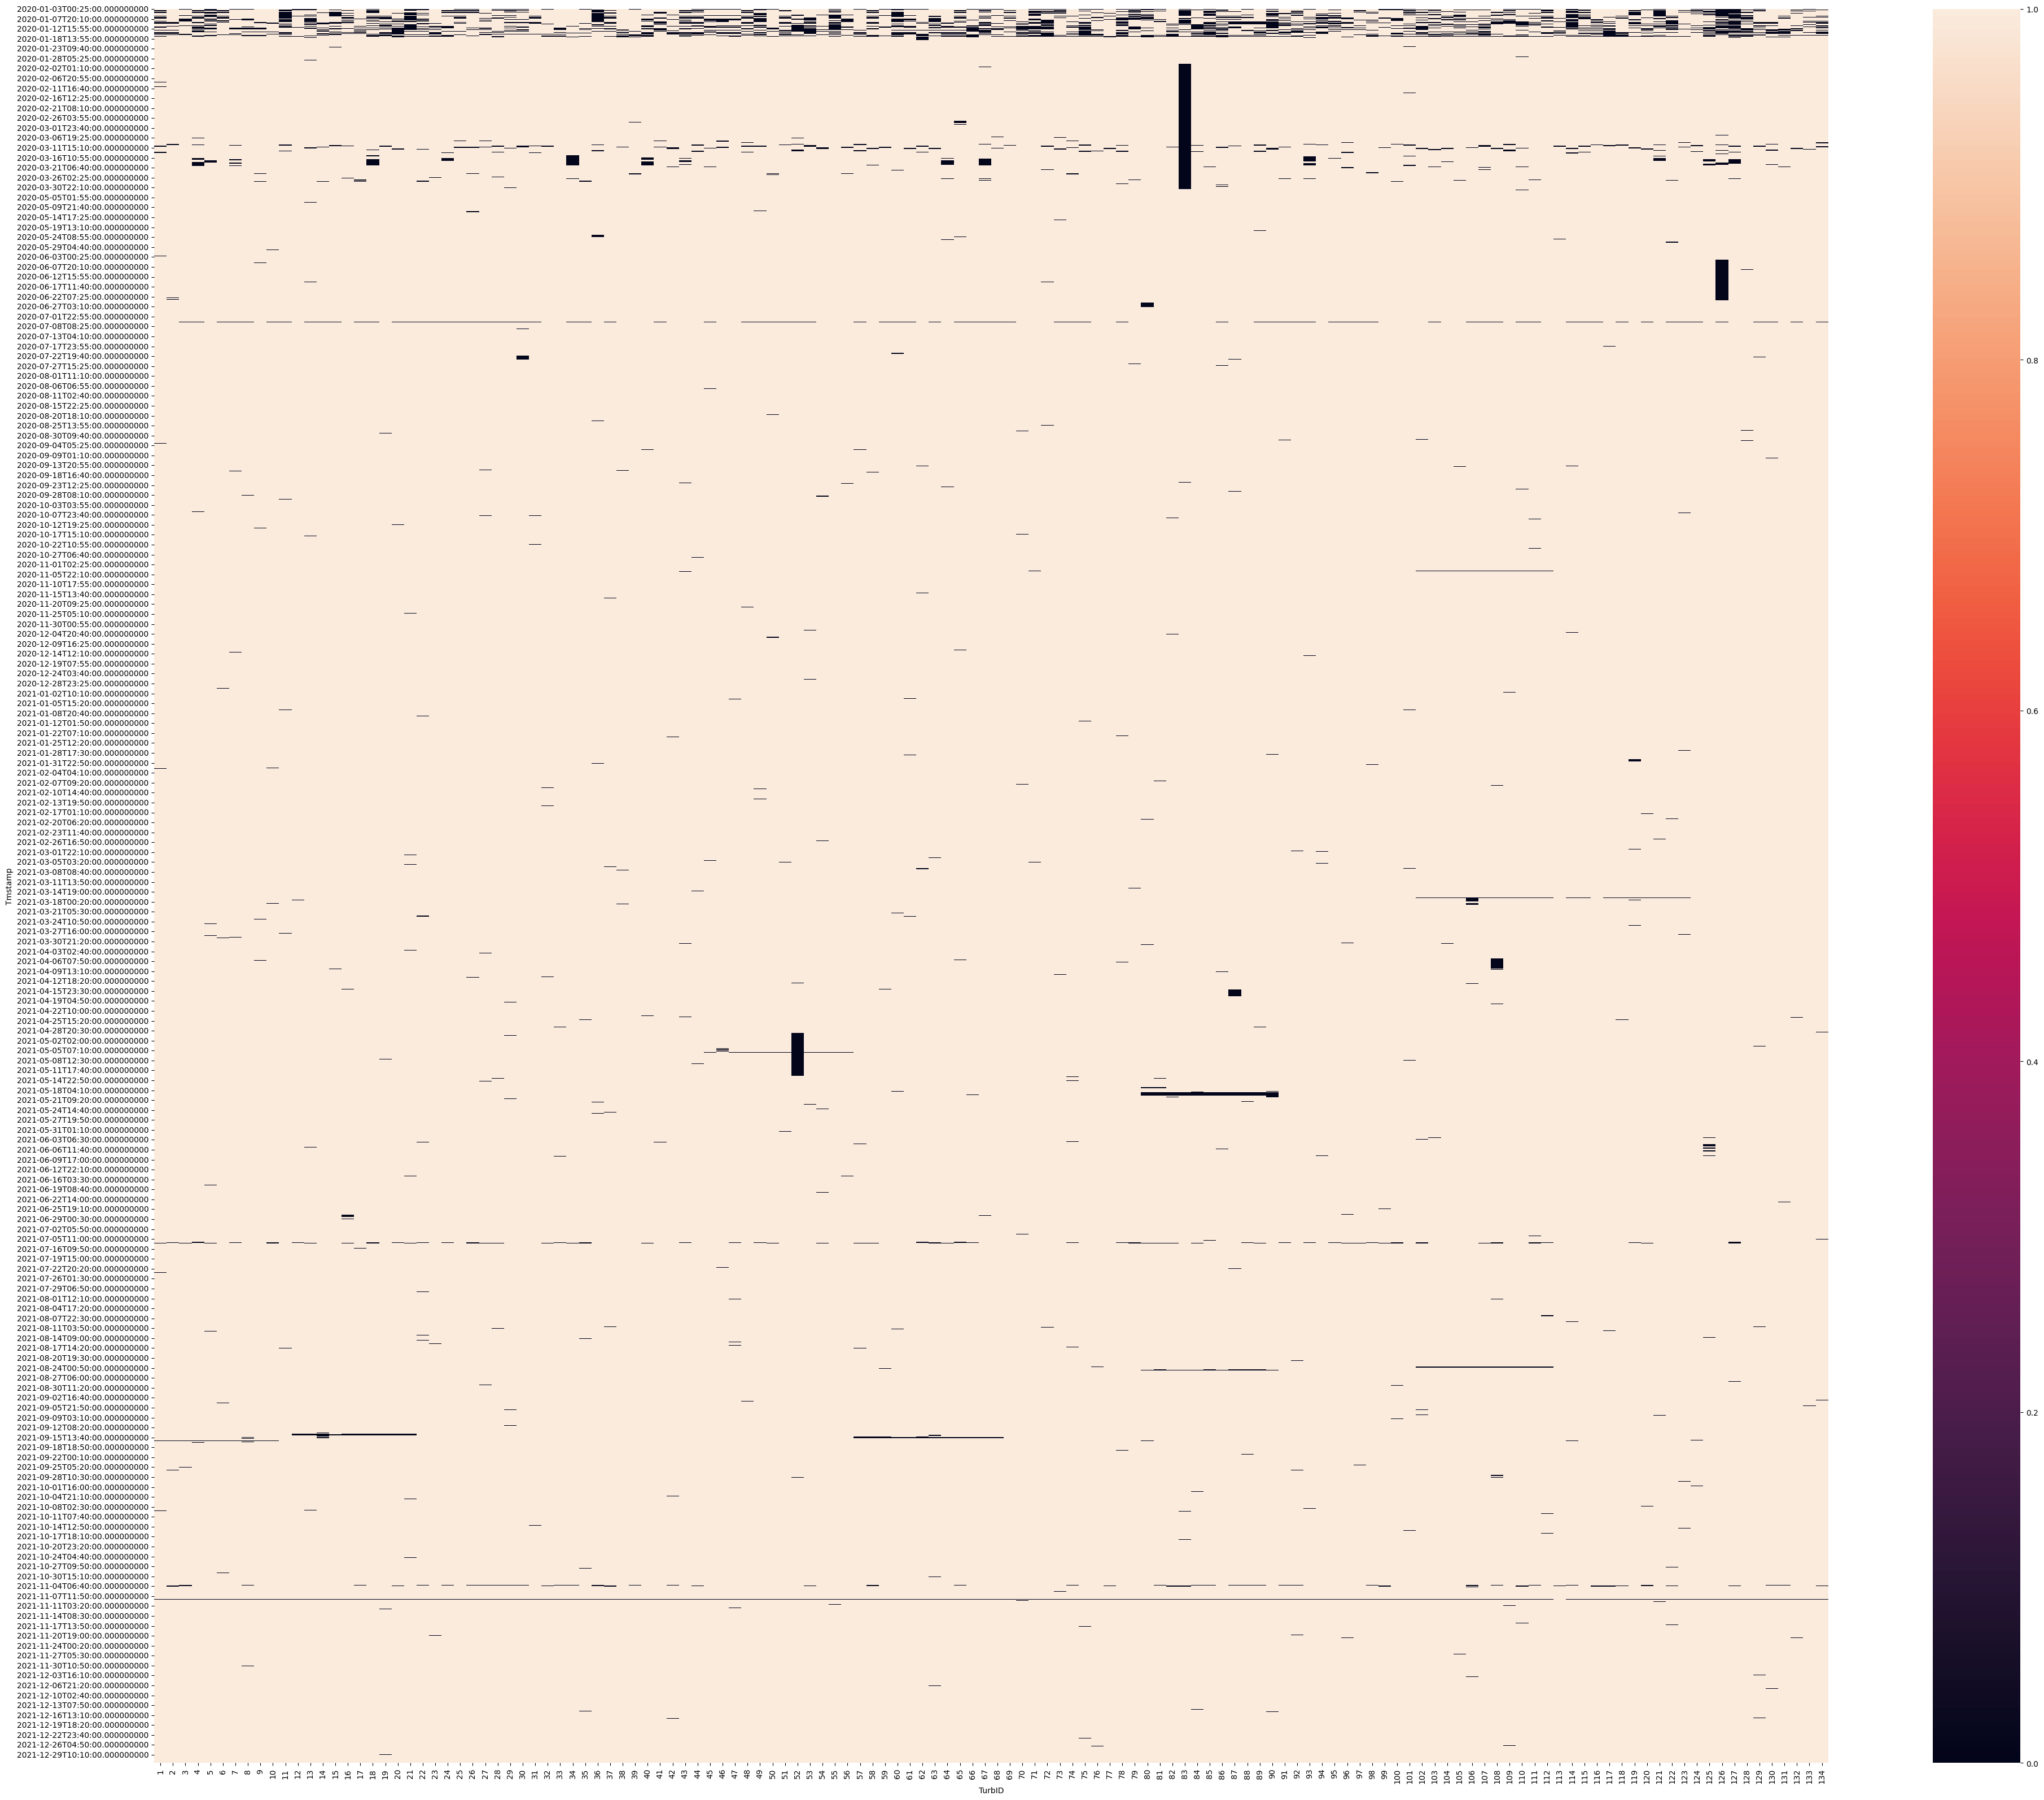

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 32))
sns.heatmap(binary_matrix)

plt.tight_layout()
plt.show()

In [92]:
for i in data_sorted.groupby('TurbID').agg(total=('Patv', 'size'), notna=('Patv', lambda x: x.notna().sum())).eval('total - notna').sort_values():
    print(i)

3263
3278
3282
3297
3303
3315
3318
3334
3337
3339
3343
3359
3366
3372
3376
3381
3385
3385
3388
3389
3391
3391
3398
3405
3409
3412
3413
3417
3424
3434
3442
3443
3443
3444
3456
3459
3459
3460
3471
3475
3484
3485
3488
3489
3494
3501
3504
3505
3509
3520
3521
3526
3527
3533
3535
3545
3555
3574
3584
3590
3591
3598
3599
3601
3601
3608
3610
3613
3617
3619
3620
3634
3637
3643
3650
3658
3666
3666
3672
3672
3674
3676
3681
3686
3686
3687
3689
3691
3708
3722
3740
3746
3752
3754
3758
3762
3765
3787
3791
3804
3807
3807
3809
3827
3835
3838
3840
3846
3850
3852
3879
3882
3883
3885
3887
3892
3929
3939
3941
3966
3973
4018
4029
4063
4068
4069
4074
4098
4166
4182
4466
5584
6033
9722


In [101]:
corr_matrix = data_sorted.corr()

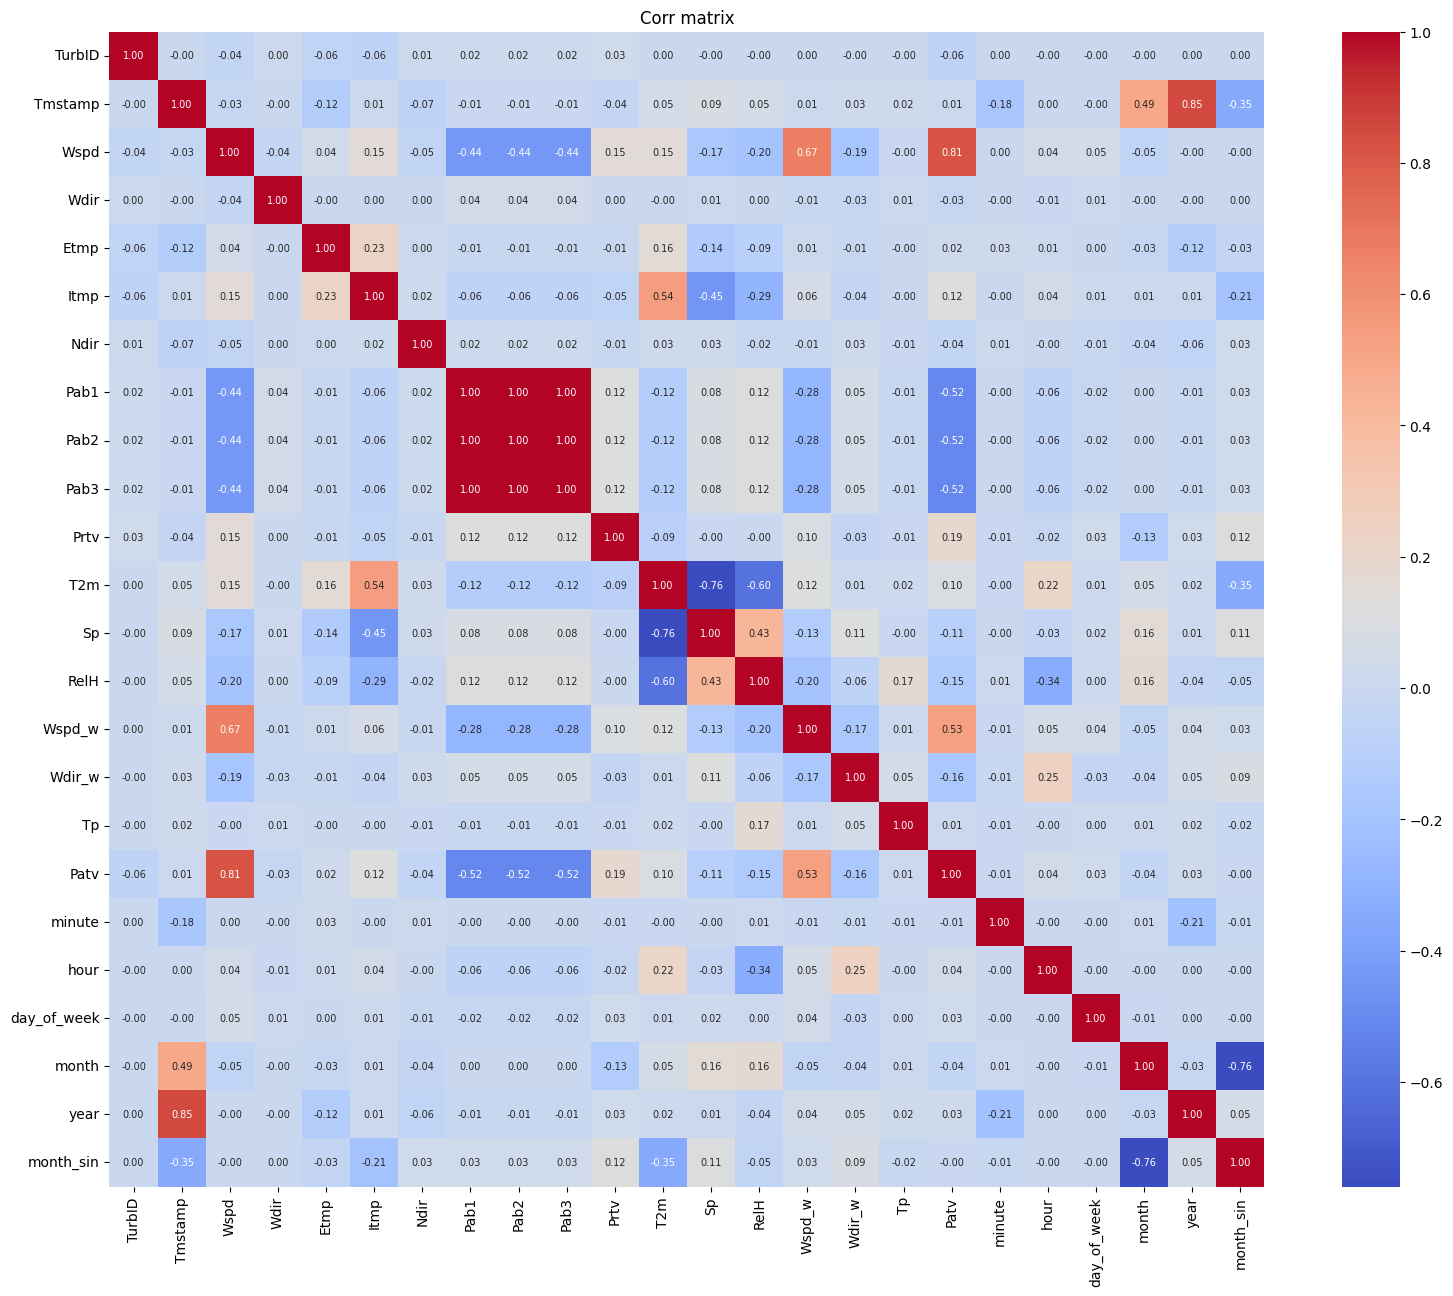

In [102]:
plt.figure(figsize=(20, 15))

sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            square=True,
            annot_kws={"size": 7})
plt.title('Corr matrix')
plt.savefig("plot.pdf")
plt.show()

In [100]:
import numpy as np


data_sorted['minute'] = data_sorted['Tmstamp'].dt.minute
data_sorted['hour'] = data_sorted['Tmstamp'].dt.hour
data_sorted['day_of_week'] = data_sorted['Tmstamp'].dt.day_of_week
data_sorted['month_sin'] = np.sin(2 * np.pi * data_sorted['Tmstamp'].dt.month / 12)
data_sorted['year'] = data_sorted['Tmstamp'].dt.year

In [126]:
data_sorted.head(135)

,TurbID,Tmstamp,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,T2m,Sp,RelH,Wspd_w,Wdir_w,Tp,Patv
3077392,1,2020-01-01 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3093504,2,2020-01-01 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3109616,3,2020-01-01 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3125728,4,2020-01-01 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3141840,5,2020-01-01 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4076336,131,2020-01-01 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4092448,132,2020-01-01 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4108560,133,2020-01-01 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4124672,134,2020-01-01 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np

class WindDataset(Dataset):
    def __init__(self, df: pd.DataFrame, history: int = 2016, horizon: int = 288):
        self.history = history
        self.horizon = horizon

        df['timestamp'] = pd.to_datetime(df['timestamp'])
        df = df.sort_values(['timestamp', 'TurbID'])

        self.turbines = df['TurbID'].unique()
        self.num_nodes = len(self.turbines)

        df_grouped = df.pivot(index='timestamp', columns='TurbID')
        df_values = df_grouped.values
        self.timestamps = df_grouped.index
        self.data = torch.tensor(df_values, dtype=torch.float32).view(len(self.timestamps), self.num_nodes, -1)

    def __len__(self):
        return len(self.data) - self.history - self.horizon

    def __getitem__(self, idx):
        x = self.data[idx : idx + self.history]
        y = self.data[idx + self.history : idx + self.history + self.horizon]
        return x.permute(1, 0, 2), y.permute(1, 2, 0)

class GraphLearner(nn.Module):
    def __init__(self, num_nodes, emb_dim=64):
        super().__init__()
        self.emb = nn.Parameter(torch.randn(num_nodes, emb_dim))
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self):
        score = self.relu(torch.matmul(self.emb, self.emb.T))
        adj = self.softmax(score)
        return adj

class DilatedInception(nn.Module):
    def __init__(self, in_channels, out_channels, dilation_factor):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=(1, 2), dilation=(1, dilation_factor))
        self.conv2 = nn.Conv2d(in_channels, out_channels, kernel_size=(1, 3), dilation=(1, dilation_factor))
        self.conv3 = nn.Conv2d(in_channels, out_channels, kernel_size=(1, 6), dilation=(1, dilation_factor))

    def forward(self, x):
        c1 = self.conv1(x)
        c2 = self.conv2(x)
        c3 = self.conv3(x)
        out = torch.cat([c1, c2, c3], dim=1)
        return out

class MTGNN(nn.Module):
    def __init__(self, num_nodes, in_dim, horizon, emb_dim=64, out_channels=32):
        super().__init__()
        self.graph_learner = GraphLearner(num_nodes, emb_dim)
        self.temporal_block = DilatedInception(in_channels=in_dim, out_channels=out_channels, dilation_factor=2)
        self.proj = nn.Linear(3*out_channels, horizon)

    def forward(self, x):
        B, N, T, F = x.shape
        adj = self.graph_learner()

        x = x.permute(0, 3, 1, 2)
        x = self.temporal_block(x)
        x = x.mean(dim=-1)
        x = x.permute(0, 2, 1)
        x = self.proj(x)
        return x.unsqueeze(2)

def train(model, dataloader, epochs=10, lr=0.001):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for xb, yb in dataloader:
            xb, yb = xb.to(device), yb.to(device)
            out = model(xb)
            out = out.squeeze(2)
            yb = yb.mean(dim=1)
            loss = criterion(out, yb)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {total_loss / len(dataloader):.4f}")


ModuleNotFoundError: No module named 'MTGNN'